$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 2 $$

![image-3.png](attachment:image-3.png)

# `01` Import Necessary Libraries

## `i` Default Libraries

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression ,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

----------------------------

# `02` Load Data

In [ ]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [ ]:
y=housing['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
X=housing.drop('median_house_value',axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


#### Split data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#### Split test data into vaildation and test

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=1234)

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17595,-120.07,36.98,12.0,1790.0,379.0,1399.0,397.0,2.5388,INLAND
6073,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948,<1H OCEAN
6251,-120.94,39.32,14.0,3120.0,595.0,1569.0,556.0,3.5385,INLAND
3161,-122.11,37.68,37.0,1976.0,481.0,1197.0,465.0,2.5772,NEAR BAY
1887,-121.34,38.67,35.0,643.0,117.0,331.0,134.0,3.0417,INLAND
...,...,...,...,...,...,...,...,...,...
8222,-120.04,36.79,48.0,1341.0,239.0,671.0,208.0,2.7917,INLAND
9449,-118.18,36.63,23.0,2311.0,487.0,1019.0,384.0,2.2574,INLAND
8471,-119.71,34.43,47.0,1572.0,417.0,790.0,384.0,2.6429,<1H OCEAN
17048,-117.92,33.62,35.0,1821.0,335.0,727.0,316.0,6.5842,<1H OCEAN


### Check some inforamation about dataset  like no.of coulmns no.of rows

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17595 to 1318
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Check missing values

In [ ]:
X_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

- There is missing values in total_bedrooms column

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

#### statistical Analysis for all numerical columns

In [ ]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.576297,35.640944,28.629300,2634.395652,537.400086,1422.226562,499.014595,3.869583
std,2.008301,2.141025,12.622547,2195.367194,422.272540,1119.964665,383.148507,1.896395
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.802500,33.930000,18.000000,1452.750000,296.000000,786.000000,280.000000,2.562500
50%,-118.500000,34.260000,29.000000,2128.000000,435.000000,1166.000000,410.000000,3.539400
75%,-118.010000,37.720000,37.000000,3138.250000,646.000000,1720.000000,603.000000,4.748350
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100


## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Note:` Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

###  **----- Show distribution for all numerical columns with histogram plot -----**

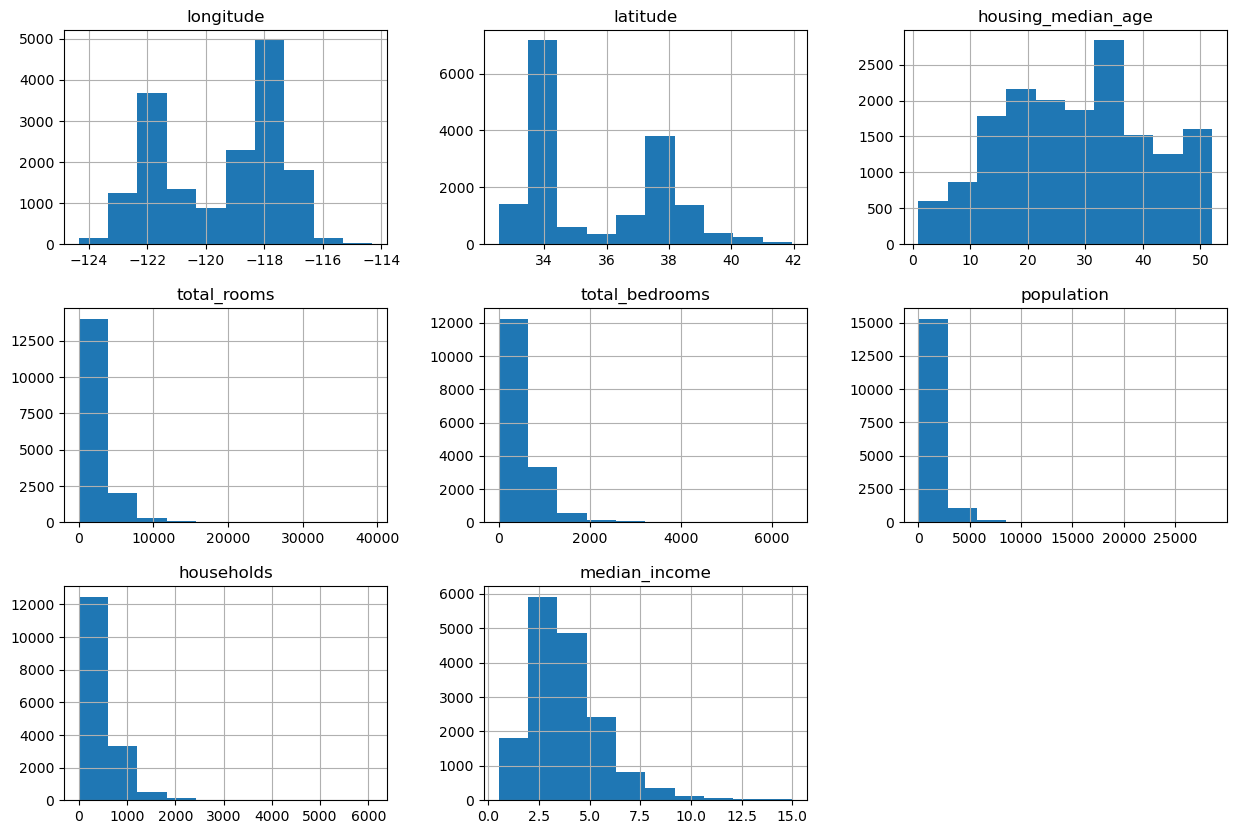

In [ ]:
X_train.hist(figsize=(15,10))
plt.show()

In [ ]:
X_train.sort_index()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

Text(0, 0.5, 'median_house_value')

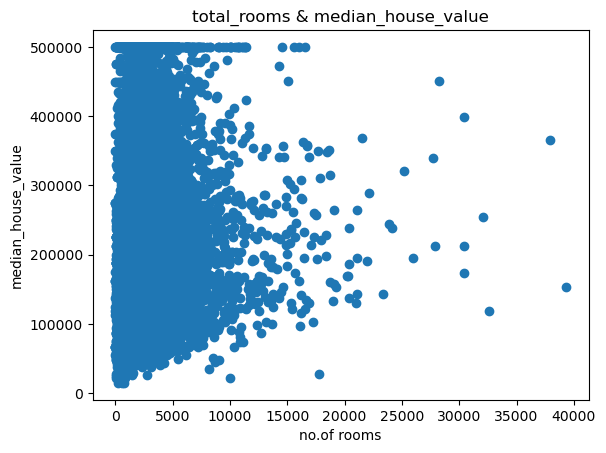

In [ ]:
plt.scatter(X_train['total_rooms'],y_train)
plt.title('total_rooms & median_house_value')
plt.xlabel('no.of rooms')
plt.ylabel('median_house_value')

Text(0, 0.5, 'median_house_value')

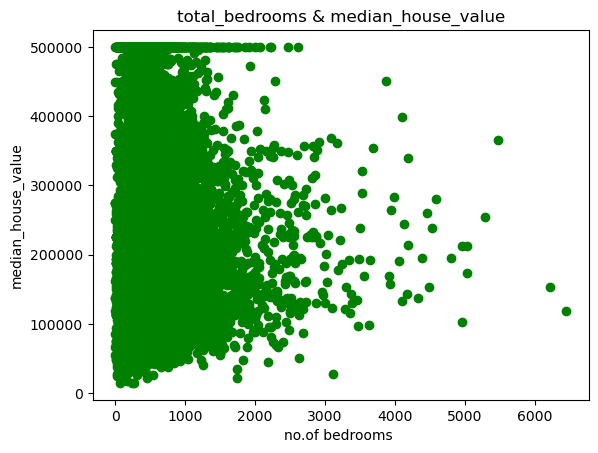

In [ ]:
plt.scatter(X_train['total_bedrooms'],y_train,color='g')
plt.title('total_bedrooms & median_house_value')
plt.xlabel('no.of bedrooms ')
plt.ylabel('median_house_value')

#### check the values that unique in ocean_proximity

In [ ]:
X_train['ocean_proximity'].unique()

array(['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### check the counts each one value  in ocean_proximity

In [ ]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     7256
INLAND        5267
NEAR OCEAN    2139
NEAR BAY      1846
ISLAND           4
Name: ocean_proximity, dtype: int64

### - Visulaize the countgs for each value in ocean_proximity columns

<Axes: >

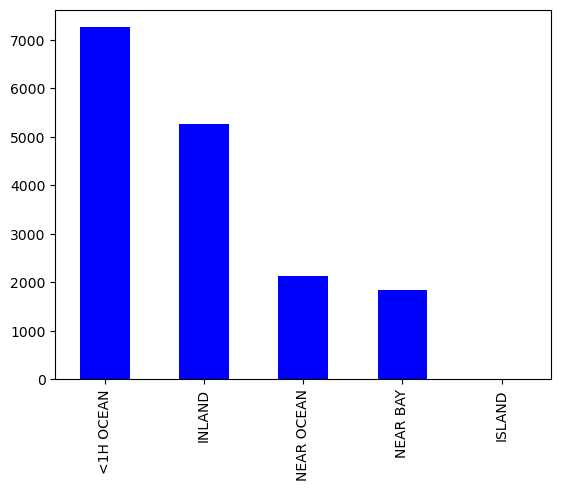

In [ ]:
X_train['ocean_proximity'].value_counts().plot(kind='bar',color='b')


####  - Show the distribution of median_income column

<Axes: xlabel='median_income', ylabel='Count'>

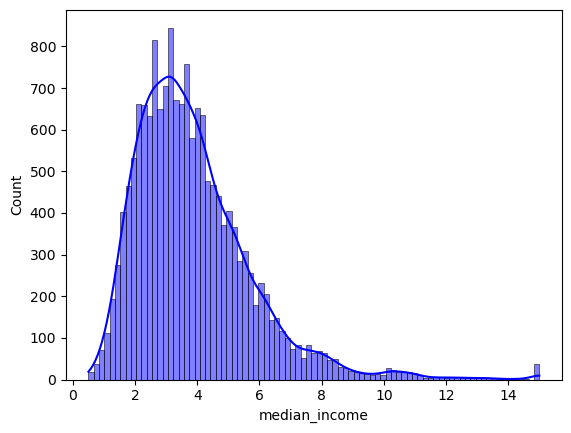

In [ ]:
sns.histplot(X_train['median_income'],kde=True,color='b')

- the distribution in this column is right skewed

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17595,-120.07,36.98,12.0,1790.0,379.0,1399.0,397.0,2.5388,INLAND
6073,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948,<1H OCEAN
6251,-120.94,39.32,14.0,3120.0,595.0,1569.0,556.0,3.5385,INLAND
3161,-122.11,37.68,37.0,1976.0,481.0,1197.0,465.0,2.5772,NEAR BAY
1887,-121.34,38.67,35.0,643.0,117.0,331.0,134.0,3.0417,INLAND


#### show the distribution of median_house_value (y train )

<Axes: xlabel='median_house_value', ylabel='Count'>

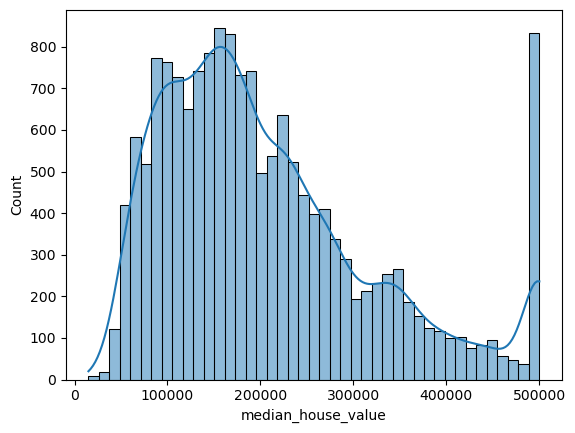

In [ ]:
sns.histplot(y_train,kde=True)

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

####  Check the Percentage of missing values in the total_bedrooms column to decide fill the nulls or drop it

In [ ]:
missing_percentage_bedrooms = (X_train.isna().sum() / len(X_train)) * 100
np.round(missing_percentage_bedrooms['total_bedrooms'],2)

0.96

- now we decide fill the null values
###### make the distribution to Know what the suitable value in the statistical values.

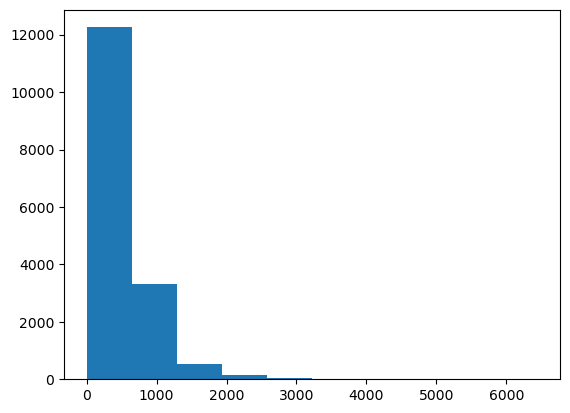

In [ ]:
plt.hist(X_train['total_bedrooms'])
plt.show()

###### fill the missing values with  median values

In [ ]:
X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(),inplace=True)

In [ ]:
X_train['total_bedrooms'].isna().sum()

0

### Now, No missing values

##### Check the duplicated values in the data

In [ ]:
X_train.duplicated().sum()

0

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17595,-120.07,36.98,12.0,1790.0,379.0,1399.0,397.0,2.5388,INLAND
6073,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948,<1H OCEAN
6251,-120.94,39.32,14.0,3120.0,595.0,1569.0,556.0,3.5385,INLAND
3161,-122.11,37.68,37.0,1976.0,481.0,1197.0,465.0,2.5772,NEAR BAY
1887,-121.34,38.67,35.0,643.0,117.0,331.0,134.0,3.0417,INLAND


In [ ]:
X_train[['ocean_proximity']]

,ocean_proximity
17595,INLAND
6073,<1H OCEAN
6251,INLAND
3161,NEAR BAY
1887,INLAND
...,...
8222,INLAND
9449,INLAND
8471,<1H OCEAN
17048,<1H OCEAN


In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_train_encoded.head().sort_index()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1887,-121.34,38.67,35.0,643.0,117.0,331.0,134.0,3.0417,0,1,0,0,0
3161,-122.11,37.68,37.0,1976.0,481.0,1197.0,465.0,2.5772,0,0,0,1,0
6073,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948,1,0,0,0,0
6251,-120.94,39.32,14.0,3120.0,595.0,1569.0,556.0,3.5385,0,1,0,0,0
17595,-120.07,36.98,12.0,1790.0,379.0,1399.0,397.0,2.5388,0,1,0,0,0


In [ ]:
train_columns = X_train_encoded.columns

In [ ]:
# scaler = StandardScaler()
scaler = RobustScaler()
scaled_data=scaler.fit_transform(X_train_encoded)
scaled_data

array([[-0.41397495,  0.7176781 , -0.89473684, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07382993, -0.1055409 , -0.68421053, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64337508,  1.33509235, -0.78947368, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.31905076,  0.04485488,  0.94736842, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15293342, -0.16886544,  0.31578947, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08174028,  0.10290237,  0.21052632, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
scaled_dataframe = pd.DataFrame(scaled_data, columns=X_train_encoded.columns)
scaled_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.413975,0.717678,-0.894737,-0.200534,-0.162319,0.249465,-0.040248,-0.457762,0.0,1.0,0.0,0.0,0.0
1,0.073830,-0.105541,-0.684211,3.918125,3.055072,2.974304,3.352941,0.757326,1.0,0.0,0.0,0.0,0.0
2,-0.643375,1.335092,-0.789474,0.588549,0.463768,0.431478,0.452012,-0.000412,0.0,1.0,0.0,0.0,0.0
3,-0.951879,0.902375,0.421053,-0.090181,0.133333,0.033191,0.170279,-0.440195,0.0,0.0,0.0,1.0,0.0
4,-0.748846,1.163588,0.315789,-0.881044,-0.921739,-0.894004,-0.854489,-0.227692,0.0,1.0,0.0,0.0,0.0


## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [ ]:
X_valid.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5992,-121.15,39.00,15.0,4145.0,691.0,1872.0,680.0,4.3553,INLAND
11147,-118.46,34.01,39.0,711.0,148.0,347.0,153.0,4.2813,<1H OCEAN
6432,-121.89,37.49,9.0,4909.0,577.0,1981.0,591.0,9.7194,<1H OCEAN
224,-117.83,33.88,18.0,2112.0,340.0,1048.0,315.0,6.9308,<1H OCEAN
289,-118.71,34.29,24.0,2983.0,406.0,1203.0,381.0,6.3236,<1H OCEAN


In [ ]:
X_valid.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        28
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

### preprocessing function

In [ ]:
def clean(x):
    x['total_bedrooms'].fillna(x['total_bedrooms'].median(),inplace=True)
    train_columns=X_train_encoded.columns
    X__encoded = pd.get_dummies(x).reindex(columns=train_columns, fill_value=0)
    cleaned_dataframe = pd.DataFrame(X__encoded)
    return cleaned_dataframe

In [ ]:
X_valid_cleaned=clean(X_valid)
X_valid_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5992,-121.15,39.00,15.0,4145.0,691.0,1872.0,680.0,4.3553,0,1,0,0,0
11147,-118.46,34.01,39.0,711.0,148.0,347.0,153.0,4.2813,1,0,0,0,0
6432,-121.89,37.49,9.0,4909.0,577.0,1981.0,591.0,9.7194,1,0,0,0,0
224,-117.83,33.88,18.0,2112.0,340.0,1048.0,315.0,6.9308,1,0,0,0,0
289,-118.71,34.29,24.0,2983.0,406.0,1203.0,381.0,6.3236,1,0,0,0,0


In [ ]:
scaled_data_vaild=scaler.transform(X_valid_cleaned)
scaled_data_vaild_df = pd.DataFrame(scaled_data_vaild,columns=X_valid_cleaned.columns)
scaled_data_vaild_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.698748,1.250660,-0.736842,1.196678,0.742029,0.755889,0.835913,0.373264,0.0,1.0,0.0,0.0,0.0
1,0.010547,-0.065963,0.526316,-0.840700,-0.831884,-0.876874,-0.795666,0.339410,1.0,0.0,0.0,0.0,0.0
2,-0.893869,0.852243,-1.052632,1.649956,0.411594,0.872591,0.560372,2.827275,1.0,0.0,0.0,0.0,0.0
3,0.176664,-0.100264,-0.578947,-0.009493,-0.275362,-0.126338,-0.294118,1.551525,1.0,0.0,0.0,0.0,0.0
4,-0.055372,0.007916,-0.263158,0.507268,-0.084058,0.039615,-0.089783,1.273738,1.0,0.0,0.0,0.0,0.0


- vaild_test data is prepared

----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [ ]:
li_model = LinearRegression()
li_model.fit(scaled_dataframe, y_train)

LinearRegression()

## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [ ]:
y_pred = li_model.predict(X_valid_cleaned)
y_pred

array([-59952642.95160404,  -1239047.95649351, -74311939.50739509, ...,
       -61968729.79303796, -37428365.81881475, -40999566.0145654 ])

In [ ]:
mean_squared_error(y_valid, y_pred)

3518330136908353.0

In [ ]:
mean_absolute_error(y_valid, y_pred)

40075218.41643509

In [ ]:
r2_score(y_valid, y_pred)

-263455.162577058

----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [ ]:
sgd_regressor = SGDRegressor(learning_rate='constant')
sgd_regressor.fit(scaled_data, y_train)

SGDRegressor(learning_rate='constant')

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [ ]:
y_pred_sgd = sgd_regressor.predict(X_valid_cleaned)
y_pred_sgd

C:\Users\XPS 9560\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


array([-1.02609373e+08, -7.98656918e+06, -1.24847906e+08, ...,
       -9.88316630e+07, -6.71335242e+07, -8.20391270e+07])

In [ ]:
mean_squared_error(y_valid, y_pred_sgd)

9243364173238908.0

In [ ]:
mean_absolute_error(y_valid, y_pred_sgd)

68876338.73252684

In [ ]:
r2_score(y_valid, y_pred_sgd)

-692151.5722778463

## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [ ]:
params = {
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}


## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

In [ ]:
regressor = GridSearchCV(sgd_regressor, params, cv=3, verbose=5, n_jobs=-1)
regressor.fit(scaled_data, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=SGDRegressor(learning_rate='constant'), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2']},
             verbose=5)

In [ ]:
pd.DataFrame(regressor.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.996324,0.280485,0.051197,1.401669e-02,0.0001,0.0001,l1,"{'alpha': 0.0001, 'eta0': 0.0001, 'penalty': '...",6.330856e-01,6.549300e-01,6.480763e-01,6.453640e-01,9.121856e-03,8
1,0.651242,0.030533,0.069149,4.150057e-02,0.0001,0.0001,l2,"{'alpha': 0.0001, 'eta0': 0.0001, 'penalty': '...",6.322140e-01,6.530904e-01,6.503961e-01,6.452335e-01,9.271636e-03,11
2,0.310858,0.134601,0.080120,6.954872e-02,0.0001,0.001,l1,"{'alpha': 0.0001, 'eta0': 0.001, 'penalty': 'l1'}",6.319769e-01,6.526682e-01,6.511194e-01,6.452548e-01,9.410199e-03,10
3,0.157905,0.118551,0.001996,3.122788e-06,0.0001,0.001,l2,"{'alpha': 0.0001, 'eta0': 0.001, 'penalty': 'l2'}",6.322827e-01,6.535164e-01,6.520834e-01,6.459608e-01,9.689580e-03,3
4,0.067486,0.011403,0.004652,3.076928e-03,0.0001,0.01,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'l1'}",6.150898e-01,6.417169e-01,6.383512e-01,6.317193e-01,1.183887e-02,19
5,0.036570,0.003392,0.003323,2.048158e-03,0.0001,0.01,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'l2'}",6.236521e-01,6.440714e-01,6.364469e-01,6.347234e-01,8.424750e-03,18
6,0.077461,0.017415,0.003322,4.694599e-04,0.0001,0.1,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'penalty': 'l1'}",-8.072141e+11,-2.923101e+11,-1.329901e+12,-8.098086e+11,4.235989e+11,37
7,0.032579,0.003292,0.002662,4.718199e-04,0.0001,0.1,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'penalty': 'l2'}",-4.540353e+10,-5.667662e+10,-5.819514e+11,-2.280105e+11,2.503163e+11,35
8,0.048203,0.007299,0.002662,4.711633e-04,0.0001,1,l1,"{'alpha': 0.0001, 'eta0': 1, 'penalty': 'l1'}",-6.083942e+15,-3.759931e+15,-1.760112e+15,-3.867995e+15,1.766850e+15,48
9,0.051530,0.010935,0.002660,4.801392e-04,0.0001,1,l2,"{'alpha': 0.0001, 'eta0': 1, 'penalty': 'l2'}",-1.275471e+15,-5.805292e+14,-3.623738e+15,-1.826579e+15,1.302068e+15,45


In [ ]:
regressor.best_score_

0.6474402517602974

In [ ]:
regressor.best_params_

{'alpha': 1, 'eta0': 0.001, 'penalty': 'l1'}

In [ ]:
best_model=regressor.best_estimator_
best_model

SGDRegressor(alpha=1, eta0=0.001, learning_rate='constant', penalty='l1')

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
X_test_cleaned=clean(X_test)
X_test_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1374,-118.09,33.79,36.0,4210.0,657.0,1911.0,631.0,5.8491,1,0,0,0,0
6548,-118.92,34.19,16.0,3631.0,974.0,2585.0,923.0,3.0691,1,0,0,0,0
18421,-122.40,37.73,48.0,1489.0,326.0,1115.0,356.0,2.6364,0,0,0,1,0
20437,-122.16,37.70,36.0,1097.0,208.0,568.0,225.0,2.9917,0,0,0,1,0
19174,-117.05,32.75,43.0,1718.0,344.0,826.0,336.0,2.7014,0,0,0,0,1


In [ ]:
scaled_data_test=scaler.transform(X_test_cleaned)
scaled_data_test_df = pd.DataFrame(scaled_data_test,columns=X_test_cleaned.columns)
scaled_data_test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.108108,-0.124011,0.368421,1.235242,0.643478,0.797645,0.684211,1.056660,1.0,0.0,0.0,0.0,0.0
1,-0.110745,-0.018470,-0.684211,0.891724,1.562319,1.519272,1.588235,-0.215157,1.0,0.0,0.0,0.0,0.0
2,-1.028345,0.915567,1.000000,-0.379116,-0.315942,-0.054604,-0.167183,-0.413112,0.0,0.0,0.0,1.0,0.0
3,-0.965063,0.907652,0.368421,-0.611688,-0.657971,-0.640257,-0.572755,-0.250566,0.0,0.0,0.0,1.0,0.0
4,0.382334,-0.398417,0.736842,-0.243251,-0.263768,-0.364026,-0.229102,-0.383375,0.0,0.0,0.0,0.0,1.0


In [ ]:
best_pred=best_model.predict(scaled_data_test)
best_pred

array([299864.94108983, 202640.57451949, 198044.92284014, ...,
       162063.23099486, 144004.40377835, 280457.40608802])

In [ ]:
mean_squared_error(y_test, best_pred)

5106362783.415539

In [ ]:
mean_absolute_error(y_test, best_pred)

50787.209793620874

In [ ]:
round(r2_score(y_test, best_pred),2)

0.59

#### Visualize actual and prediced

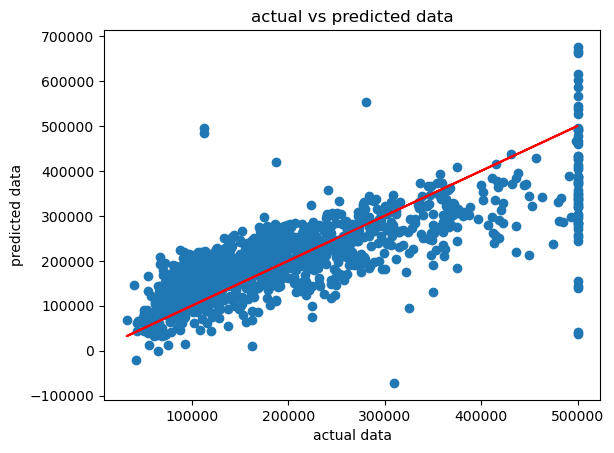

In [ ]:
plt.scatter(y_test, best_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.title('actual vs predicted data')
plt.plot(y_test, y_test, color='r')
plt.show()

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
X_train.iloc[:, :8]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17595,-120.07,36.98,12.0,1790.0,379.0,1399.0,397.0,2.5388
6073,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948
6251,-120.94,39.32,14.0,3120.0,595.0,1569.0,556.0,3.5385
3161,-122.11,37.68,37.0,1976.0,481.0,1197.0,465.0,2.5772
1887,-121.34,38.67,35.0,643.0,117.0,331.0,134.0,3.0417
...,...,...,...,...,...,...,...,...
8222,-120.04,36.79,48.0,1341.0,239.0,671.0,208.0,2.7917
9449,-118.18,36.63,23.0,2311.0,487.0,1019.0,384.0,2.2574
8471,-119.71,34.43,47.0,1572.0,417.0,790.0,384.0,2.6429
17048,-117.92,33.62,35.0,1821.0,335.0,727.0,316.0,6.5842


### make pipeline

In [ ]:
numeric_preprocessor = Pipeline(
    steps=[
        ("missing", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("scaler", RobustScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ['ocean_proximity']),
        ("numerical", numeric_preprocessor,  X_train.columns[:8]),
    ]
)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('SGD', SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='constant', penalty='l1'))])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity']),
                                                 ('numerical',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'))])),
                ('SGD',
                 SGDRegressor(alpha=0.001, eta0=0.0001,
                              learning_rate='constant', penalty='l1'))])

In [ ]:
y_pred_pip = pipeline.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_pip)

5143276687.248343

In [ ]:
mean_absolute_error(y_test, y_pred_pip)

51409.231224929266

In [ ]:
r2_score(y_test, y_pred_pip)

0.5880414684294814

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$